# Project 1 - Group 6
###### <font color='gray'>Authors: Aisha Baitemoriva-Othman, Adonis McQueen, Angela Kim, Deja Prade, James Kang</font>

In [1]:
## Import libraries ##
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
## Import datasets ##

# Aisha's datasets: Rotten Tomatoes
df_rt_movie_info = pd.read_csv('data/rt.movie_info.tsv.gz',sep='\t')
df_rt_reviews = pd.read_csv('data/rt.reviews.tsv.gz',sep='\t',encoding='latin1')

# Adonis's dataset: Box Office Mojo
df_gross = pd.read_csv("data/bom.movie_gross.csv.gz")

# Angela's dataset: The Numbers
mb = pd.read_csv('data/tn.movie_budgets.csv.gz')

# Deja's dataset: TMDB
movie_type = pd.read_csv('data/tmdb.movies.csv.gz')

# James's datasets: IMDB
title_ratings = pd.read_csv('data/imdb.title.ratings.csv.gz')
title_basics = pd.read_csv('data/imdb.title.basics.csv.gz')
title_akas = pd.read_csv('data/imdb.title.akas.csv.gz')

### Questions
<ul>
<li>*What are the highest gross values for both domestic and worldwide?*
<br>
<li>*What are the domestic and worldwide profits?*
<br>
<li>*Are there any values we can reasonably say won't help answer our questions, such as gross values that are too low and can be removed from our working dataset?*
</ul>

### Angela's Data Analysis:

In [3]:
## Preliminary analysis
mb.head(10)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,"$306,000,000","$936,662,225","$2,053,311,220"
6,7,"Apr 27, 2018",Avengers: Infinity War,"$300,000,000","$678,815,482","$2,048,134,200"
7,8,"May 24, 2007",Pirates of the Caribbean: At Worldâs End,"$300,000,000","$309,420,425","$963,420,425"
8,9,"Nov 17, 2017",Justice League,"$300,000,000","$229,024,295","$655,945,209"
9,10,"Nov 6, 2015",Spectre,"$300,000,000","$200,074,175","$879,620,923"


In [4]:
## Checking datatypes and looking for any missing values
mb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


**Observations and Insights:**
<ul>
<li>There are 5782 total entries with 0 missing values.
<li>The release date column is the object datatype and should be changed to the datetime datatype.
<li>The production budget, domestic gross, and worldwide gross columns are also object datatypes and should be changed to integer.
</ul>

In [5]:
## Changing release_date to datetime
mb['release_date'] = pd.to_datetime(mb['release_date'])

## Changing production_budget, domestic_gross, and worldwide_gross to integer

mb['production_budget'] = mb['production_budget'].str.replace( ',' , '')
mb['production_budget'] = mb['production_budget'].str.replace( '$' , '')
mb['production_budget'] = pd.to_numeric(mb['production_budget'])

mb['domestic_gross'] = mb['domestic_gross'].str.replace( ',' , '')
mb['domestic_gross'] = mb['domestic_gross'].str.replace( '$' , '')
mb['domestic_gross'] = pd.to_numeric(mb['domestic_gross'])

mb['worldwide_gross'] = mb['worldwide_gross'].str.replace( ',' , '')
mb['worldwide_gross'] = mb['worldwide_gross'].str.replace( '$' , '')
mb['worldwide_gross'] = pd.to_numeric(mb['worldwide_gross'])


## Check that all changes have been correctly made
mb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 5782 non-null   int64         
 1   release_date       5782 non-null   datetime64[ns]
 2   movie              5782 non-null   object        
 3   production_budget  5782 non-null   int64         
 4   domestic_gross     5782 non-null   int64         
 5   worldwide_gross    5782 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 271.2+ KB


In [6]:
print(list(mb['domestic_gross'].sort_values(ascending=False)))

[936662225, 760507625, 700059566, 678815482, 659363944, 652270625, 623279547, 620181382, 608581744, 533720947, 532177324, 504014165, 486295561, 474544677, 460998007, 459005868, 448139099, 441226247, 435110554, 426525952, 424668047, 423315812, 421785283, 417719760, 415004880, 412563408, 408992272, 408084349, 408010692, 404508916, 403706375, 402111870, 400738009, 395708305, 389813101, 381193157, 380529370, 380270577, 377845905, 376057266, 373524485, 370782930, 368384330, 368065385, 364001123, 363070709, 356461711, 353007020, 352390543, 350126372, 342548984, 341268248, 337135885, 336530303, 336045770, 335061807, 334201140, 334191110, 333172112, 330360194, 330151138, 327481748, 325100054, 324591735, 322719944, 319246193, 318604126, 317871467, 317101119, 315544750, 315058289, 312433331, 310676740, 309420425, 309205079, 306169255, 305411224, 304360277, 303003568, 302089278, 300531751, 296623634, 296131568, 293506292, 293004164, 292576195, 292324737, 292137260, 291710957, 291045518, 290271960

**Observations & Insights:**
<ul>
<li>There are a lot of domestic gross values that are 0 that can reasonably be removed from the working dataset.
<li>Rows where the gross is "too low" for our analysis can also reasonably be dropped.
</ul>

In [7]:
## Remove rows with domestic_gross < $20,000,000 because we want to focus on highest grossing films

mb = mb[mb['domestic_gross'] > 20000000]

mb.head(10)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,2009-12-18,Avatar,425000000,760507625,2776345279
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747
5,6,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220
6,7,2018-04-27,Avengers: Infinity War,300000000,678815482,2048134200
7,8,2007-05-24,Pirates of the Caribbean: At Worldâs End,300000000,309420425,963420425
8,9,2017-11-17,Justice League,300000000,229024295,655945209
9,10,2015-11-06,Spectre,300000000,200074175,879620923


In [8]:
## Remove rows with release_date before 2010 to focus on analyzing data from the most recent decade

mb = mb[(mb['release_date']) >= '2010-01-01']

mb.head(10)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747
5,6,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220
6,7,2018-04-27,Avengers: Infinity War,300000000,678815482,2048134200
8,9,2017-11-17,Justice League,300000000,229024295,655945209
9,10,2015-11-06,Spectre,300000000,200074175,879620923
10,11,2012-07-20,The Dark Knight Rises,275000000,448139099,1084439099
11,12,2018-05-25,Solo: A Star Wars Story,275000000,213767512,393151347


In [9]:
## Create two new columns for domestic profit and worldwide profit
## Remove rows with negative profits

mb['domestic_profit'] = (mb['domestic_gross'] - mb['production_budget'])
mb['worldwide_profit'] = (mb['worldwide_gross'] - mb['production_budget'])
mb = mb[(mb['domestic_profit'] > 0) & (mb['worldwide_profit'] > 0)]

In [10]:
## Sort by highest domestic profits

mb_dp = mb.sort_values(by=['domestic_profit'], ascending=False)
mb_dp.head(30)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,domestic_profit,worldwide_profit
5,6,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,630662225,1747311220
41,42,2018-02-16,Black Panther,200000000,700059566,1348258224,500059566,1148258224
33,34,2015-06-12,Jurassic World,215000000,652270625,1648854864,437270625,1433854864
43,44,2018-06-15,Incredibles 2,200000000,608581744,1242520711,408581744,1042520711
26,27,2012-05-04,The Avengers,225000000,623279547,1517935897,398279547,1292935897
6,7,2018-04-27,Avengers: Infinity War,300000000,678815482,2048134200,378815482,1748134200
134,35,2017-03-17,Beauty and the Beast,160000000,504014165,1259199706,344014165,1099199706
44,45,2016-12-16,Rogue One: A Star Wars Story,200000000,532177324,1049102856,332177324,849102856
537,38,2012-03-23,The Hunger Games,80000000,408010692,677923379,328010692,597923379
437,38,2017-12-20,Jumanji: Welcome to the Jungle,90000000,404508916,964496193,314508916,874496193


In [11]:
## Sort by highest worldwide profits

mb_wp = mb.sort_values(by=['worldwide_profit'], ascending=False)
mb_wp.head(30)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,domestic_profit,worldwide_profit
6,7,2018-04-27,Avengers: Infinity War,300000000,678815482,2048134200,378815482,1748134200
5,6,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,630662225,1747311220
33,34,2015-06-12,Jurassic World,215000000,652270625,1648854864,437270625,1433854864
66,67,2015-04-03,Furious 7,190000000,353007020,1518722794,163007020,1328722794
26,27,2012-05-04,The Avengers,225000000,623279547,1517935897,398279547,1292935897
260,61,2011-07-15,Harry Potter and the Deathly Hallows: Part II,125000000,381193157,1341693157,256193157,1216693157
41,42,2018-02-16,Black Panther,200000000,700059566,1348258224,500059566,1148258224
112,13,2018-06-22,Jurassic World: Fallen Kingdom,170000000,417719760,1305772799,247719760,1135772799
155,56,2013-11-22,Frozen,150000000,400738009,1272469910,250738009,1122469910
134,35,2017-03-17,Beauty and the Beast,160000000,504014165,1259199706,344014165,1099199706


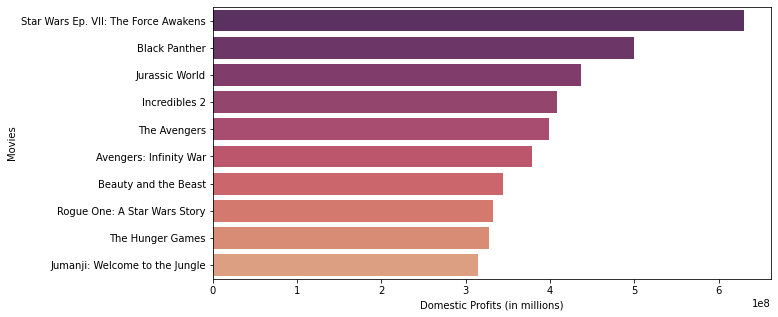

In [12]:
## Bar chart of Top 10 Movies with Highest Domestic Profits

fig, ax = plt.subplots(figsize=(10,5))

x1 = mb_dp['movie'][0:10]
y1 = mb_dp['domestic_profit'][0:10]

ax = sns.barplot(x=y1, y=x1, palette='flare_r')
ax.set(xlabel='Domestic Profits (in millions)', ylabel='Movies');

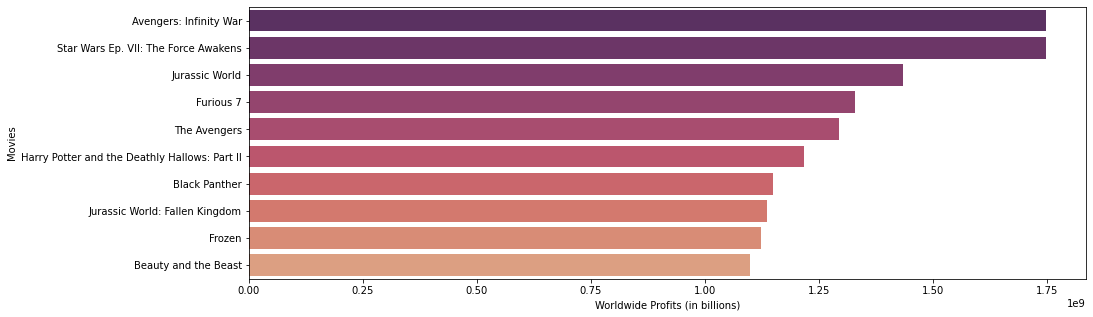

In [13]:
## Bar chart of Top 10 Movies with Highest Worldwide Profits

fig, ax = plt.subplots(figsize=(15,5))

x2 = mb_wp['movie'][0:10]
y2 = mb_wp['worldwide_profit'][0:10]

ax = sns.barplot(x=y2, y=x2, palette='flare_r')
ax.set(xlabel='Worldwide Profits (in billions)', ylabel='Movies');

#### <b>Observations & Insights:</b>
<ul>
<li>The ten movies with highest domestic profits from 2010-mid2019 are <b><i>Star Wars Ep. VII: The Force Awakens, Black Panther, Jurassic World, Incredibles 2, The Avengers, Avengers: Infinity War, Beauty and the Beast, Rogue One: A Star Wars Story, The Hunger Games, and Jumanji: Welcome to the Jungle.</i></b>
<li>The ten movies with highest worldwide profits from 2010-mid2019 are <b><i>Avengers: Infinity War, Star Wars Ep. VII: The Force Awakens, Jurassic World, Furious 7, The Avengers, Harry Potter and the Deathly Hallows: Part II, Black Panther, Jurassic World: Fallen Kingdom, Frozen, and Beauty and the Beast.</i></b>
<li>The three most frequently occuring genres of these films are <b><i>Sci-fi, Action, and Adventure.</i></b>
</ul>

### Aisha's Data Analysis:

In [14]:
df_rt_movie_info.head(3)

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN


In [15]:
df_rt_movie_info.shape

(1560, 12)

In [16]:
# removing the month and day from the theater_date and create a new column with just the year of the release date
df_rt_movie_info['new_theater_date'] = df_rt_movie_info.theater_date.str[-4:]

In [17]:
# convert the values in the 'new_theater_date' column from strings to integers
df_rt_movie_info['new_theater_date'] = df_rt_movie_info['new_theater_date'].apply(pd.to_numeric)

In [18]:
df_rt_movie_info.head(3)

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio,new_theater_date
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN,1971.0
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One,2012.0
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN,1996.0


In [19]:
# there are 494 out of 1560 rows that have a missing studio value

df_rt_movie_info['studio'].isna().value_counts()

True     1066
False     494
Name: studio, dtype: int64

In [20]:
# all the studios listed
df_rt_movie_info['studio'].value_counts().head() 

Universal Pictures        35
Paramount Pictures        27
20th Century Fox          26
Sony Pictures Classics    22
Warner Bros. Pictures     21
Name: studio, dtype: int64

In [21]:
df_rt_reviews.head(10)

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"
5,3,... Cronenberg's Cosmopolis expresses somethin...,NaN,fresh,Michelle Orange,0,Capital New York,"September 11, 2017"
6,3,"Quickly grows repetitive and tiresome, meander...",C,rotten,Eric D. Snider,0,EricDSnider.com,"July 17, 2013"
7,3,Cronenberg is not a director to be daunted by ...,2/5,rotten,Matt Kelemen,0,Las Vegas CityLife,"April 21, 2013"
8,3,"Cronenberg's cold, exacting precision and emot...",NaN,fresh,Sean Axmaker,0,Parallax View,"March 24, 2013"
9,3,Over and above its topical urgency or the bit ...,NaN,fresh,Kong Rithdee,0,Bangkok Post,"March 4, 2013"


In [22]:
df_rt_reviews[df_rt_reviews['rating'].isna()]

,id,review,rating,fresh,critic,top_critic,publisher,date
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"
5,3,... Cronenberg's Cosmopolis expresses somethin...,NaN,fresh,Michelle Orange,0,Capital New York,"September 11, 2017"
...,...,...,...,...,...,...,...,...
54409,2000,"A lightweight, uneven action comedy that freel...",NaN,rotten,Daniel Eagan,0,Film Journal International,"October 5, 2002"
54417,2000,"The funny thing is, I didn't mind all this con...",NaN,fresh,Andrew Sarris,1,Observer,"October 2, 2002"
54425,2000,Despite Besson's high-profile name being Wasab...,NaN,fresh,Andy Klein,0,New Times,"September 26, 2002"
54426,2000,The film lapses too often into sugary sentimen...,NaN,rotten,Paul Malcolm,1,L.A. Weekly,"September 26, 2002"


In [23]:
#split the "rating" column into two separate columns, separating them in "/" if the rating is not a letter
df_rt_reviews[['fn','sn']] = df_rt_reviews['rating'].str.split('/',expand=True)

In [24]:
df_rt_reviews.head()

,id,review,rating,fresh,critic,top_critic,publisher,date,fn,sn
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018",3,5
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018",NaN,NaN
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018",NaN,NaN
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017",NaN,NaN
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017",NaN,NaN


In [25]:
# replace the null values in the 'sn'(second number) with number 1. The row of the column 'sn' has a null value 
# only if the corresponding 'rating' column has a letter rating.
df_rt_reviews['sn'] = df_rt_reviews.sn.apply(lambda x: x if not pd.isnull(x) else 1)

In [26]:
# The letters we have: A+,A,A-,B+,B,B-,C+,C,C-,D+,D,D-,F+,F,F-
# A+ gets 1, A gets 93.34, A- gets 86.68, B+ gets 80.02, B gets 73.36, B- gets 66.7, 
#C+ gets 60.04
# C gets 53.38, C- gets 46.72, D+ gets 40.06, D gets 33.4, D- gets 26.74
# F+ gets 20.08, F gets 13.42, F- gets 6.66

In [27]:
# replacing the letter ratings with the appropriate percentage explained in the above cell
df_rt_reviews['fn'] = df_rt_reviews['fn'].replace(['A+','A','A-','B+','B','B-','C+','C','C-','D+','D','D-','F+','F','F-'],[1,0.9334,0.8668,0.8002,0.7336,0.667,0.6004,0.5338,0.4672,0.4006,0.334,0.2674,0.2008,0.1342,0.666])

In [28]:
# deleting a row with an outlier value in the 'fn' column which is giving an error 
# when trying to convert all string values into numeric values
df_rt_reviews = df_rt_reviews[df_rt_reviews.fn != 'N']
df_rt_reviews = df_rt_reviews[df_rt_reviews.fn != 'R']
df_rt_reviews = df_rt_reviews[df_rt_reviews.fn != '1-5']
df_rt_reviews = df_rt_reviews[df_rt_reviews.fn != 'T']
df_rt_reviews = df_rt_reviews[df_rt_reviews.fn != '3 1']

In [29]:
# converting all string values in the 'fn' and 'sn' columns into numeric values
df_rt_reviews['fn'] = df_rt_reviews['fn'].apply(pd.to_numeric)
df_rt_reviews['sn'] = df_rt_reviews['sn'].apply(pd.to_numeric)

In [30]:
df_rt_reviews['new_rating'] = df_rt_reviews.apply(lambda row: row.fn/row.sn, axis=1)

In [31]:
# delete rows that have a new_rating value higher than 1
df_rt_reviews = df_rt_reviews[df_rt_reviews.new_rating <=1]

In [32]:
df_rt_reviews.head()

,id,review,rating,fresh,critic,top_critic,publisher,date,fn,sn,new_rating
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018",3.0000,5,0.6000
6,3,"Quickly grows repetitive and tiresome, meander...",C,rotten,Eric D. Snider,0,EricDSnider.com,"July 17, 2013",0.5338,1,0.5338
7,3,Cronenberg is not a director to be daunted by ...,2/5,rotten,Matt Kelemen,0,Las Vegas CityLife,"April 21, 2013",2.0000,5,0.4000
11,3,"While not one of Cronenberg's stronger films, ...",B-,fresh,Emanuel Levy,0,EmanuelLevy.Com,"February 3, 2013",0.6670,1,0.6670
12,3,Robert Pattinson works mighty hard to make Cos...,2/4,rotten,Christian Toto,0,Big Hollywood,"January 15, 2013",2.0000,4,0.5000


In [33]:
#creating a new dataset with only 'id' and 'new_rating' columns of the 'df_rt_reviews' dataset
# so we can merge it later on with the 'df_rt_movie_info' dataset.
new_rt_reviews = pd.DataFrame(zip(df_rt_reviews.id, df_rt_reviews.new_rating))

In [34]:
# renaming the columns back into original names
new_rt_reviews.rename(columns={0: 'id', 1: 'rating'}, inplace=True)

In [35]:
new_rt_reviews.head()

,id,rating
0,3,0.6000
1,3,0.5338
2,3,0.4000
3,3,0.6670
4,3,0.5000


In [36]:
df_rt_movie_info.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio,new_theater_date
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN,1971.0
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One,2012.0
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN,1996.0
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN,1994.0
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN,NaN


In [37]:
new_rt_movie_info= pd.DataFrame(zip(df_rt_movie_info.id, df_rt_movie_info.genre,df_rt_movie_info.runtime))

In [38]:
new_rt_movie_info.head()

,0,1,2
0,1,Action and Adventure|Classics|Drama,104 minutes
1,3,Drama|Science Fiction and Fantasy,108 minutes
2,5,Drama|Musical and Performing Arts,116 minutes
3,6,Drama|Mystery and Suspense,128 minutes
4,7,Drama|Romance,200 minutes


In [39]:
# renaming the columns back into original names
new_rt_movie_info.rename(columns={0: 'id', 1: 'genres',2: 'runtime'}, inplace=True)

In [40]:
new_rt_movie_info.head()

,id,genres,runtime
0,1,Action and Adventure|Classics|Drama,104 minutes
1,3,Drama|Science Fiction and Fantasy,108 minutes
2,5,Drama|Musical and Performing Arts,116 minutes
3,6,Drama|Mystery and Suspense,128 minutes
4,7,Drama|Romance,200 minutes


In [41]:
# left joining the new_rt_movie_info to new_rt_reviews
merged_datasets = pd.merge(new_rt_reviews,new_rt_movie_info,on='id',how='left')

In [42]:
merged_datasets.head()

,id,rating,genres,runtime
0,3,0.6000,Drama|Science Fiction and Fantasy,108 minutes
1,3,0.5338,Drama|Science Fiction and Fantasy,108 minutes
2,3,0.4000,Drama|Science Fiction and Fantasy,108 minutes
3,3,0.6670,Drama|Science Fiction and Fantasy,108 minutes
4,3,0.5000,Drama|Science Fiction and Fantasy,108 minutes


In [43]:
# first step in splitting the genres of each row into separate rows for each genre of each movie: 
# we are creating a list out of each genres string such as this: 'Action and Adventure|Classics|Drama'
merged_datasets['genres']=merged_datasets['genres'].str.split('|')

In [44]:
# second step in splitting the genres of each row into separate rows for each genre of each movie: 
merged_datasets = merged_datasets.explode('genres')

In [45]:
merged_datasets.head()

,id,rating,genres,runtime
0,3,0.6000,Drama,108 minutes
0,3,0.6000,Science Fiction and Fantasy,108 minutes
1,3,0.5338,Drama,108 minutes
1,3,0.5338,Science Fiction and Fantasy,108 minutes
2,3,0.4000,Drama,108 minutes


In [46]:
# getting rid of text characters in the 'runtime' column 
merged_datasets['runtime'] = merged_datasets['runtime'].str.replace(' minutes','')

In [47]:
# converting the 'runtime' column's strings values into floats
merged_datasets['runtime'] = pd.to_numeric(merged_datasets['runtime'])

In [48]:
merged_datasets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88969 entries, 0 to 40284
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       88969 non-null  int64  
 1   rating   88969 non-null  float64
 2   genres   88896 non-null  object 
 3   runtime  87648 non-null  float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.4+ MB


In [49]:
merged_datasets['genres'].value_counts()
# the value count of movies by genre. The last four genre categories are too low in numbers compared to
# other movie genres
# We think it is best to remove them from our dataset

Drama                          24708
Comedy                         16177
Action and Adventure            9687
Mystery and Suspense            8717
Romance                         6000
Science Fiction and Fantasy     5442
Kids and Family                 3483
Art House and International     3304
Horror                          3179
Animation                       2009
Musical and Performing Arts     1558
Classics                        1531
Western                          899
Documentary                      845
Special Interest                 644
Sports and Fitness               313
Television                       158
Faith and Spirituality           149
Cult Movies                       38
Gay and Lesbian                   31
Anime and Manga                   24
Name: genres, dtype: int64

In [50]:
# creating a list of genres that are not statistically significant
not_significant_genres_list = ['Anime and Manga','Gay and Lesbian','Cult Movies','Faith and Spirituality','Television','Sports and Fitness','Documentary','Western','Special Interest']

In [51]:
# deleting the not statistically insignificant genres from the dataset and creating a new dataset without those genres
new_merged_datasets = merged_datasets[~merged_datasets.genres.isin(not_significant_genres_list)]

In [52]:
new_merged_datasets['genres'].value_counts()

Drama                          24708
Comedy                         16177
Action and Adventure            9687
Mystery and Suspense            8717
Romance                         6000
Science Fiction and Fantasy     5442
Kids and Family                 3483
Art House and International     3304
Horror                          3179
Animation                       2009
Musical and Performing Arts     1558
Classics                        1531
Name: genres, dtype: int64

In [53]:
# finding the mean of runtime for each genre
average_runtime_per_genre = new_merged_datasets.groupby('genres', as_index=False)['runtime'].mean()
average_runtime_per_genre

,genres,runtime
0,Action and Adventure,112.336856
1,Animation,94.461921
2,Art House and International,110.340212
3,Classics,123.666884
4,Comedy,103.603698
5,Drama,113.950501
6,Horror,100.170813
7,Kids and Family,101.044991
8,Musical and Performing Arts,111.818999
9,Mystery and Suspense,111.772480


In [54]:
# renaming the 'runtime' column into the 'mean_runtime'
average_runtime_per_genre.rename(columns={'runtime': 'mean_runtime'}, inplace=True)

In [55]:
# finding the mean of the ratings for each genre
average_rating_per_genre = new_merged_datasets.groupby('genres', as_index=False)['rating'].mean()
average_rating_per_genre

,genres,rating
0,Action and Adventure,0.609437
1,Animation,0.652591
2,Art House and International,0.697281
3,Classics,0.717794
4,Comedy,0.613370
5,Drama,0.659383
6,Horror,0.538936
7,Kids and Family,0.619916
8,Musical and Performing Arts,0.632903
9,Mystery and Suspense,0.622231


In [56]:
# renaming the "rating" column into the 'mean_rating'
average_rating_per_genre.rename(columns={'rating': 'mean_rating'}, inplace=True)

In [57]:
average_runtime_per_genre

,genres,mean_runtime
0,Action and Adventure,112.336856
1,Animation,94.461921
2,Art House and International,110.340212
3,Classics,123.666884
4,Comedy,103.603698
5,Drama,113.950501
6,Horror,100.170813
7,Kids and Family,101.044991
8,Musical and Performing Arts,111.818999
9,Mystery and Suspense,111.772480


In [58]:
average_rating_per_genre

,genres,mean_rating
0,Action and Adventure,0.609437
1,Animation,0.652591
2,Art House and International,0.697281
3,Classics,0.717794
4,Comedy,0.613370
5,Drama,0.659383
6,Horror,0.538936
7,Kids and Family,0.619916
8,Musical and Performing Arts,0.632903
9,Mystery and Suspense,0.622231


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

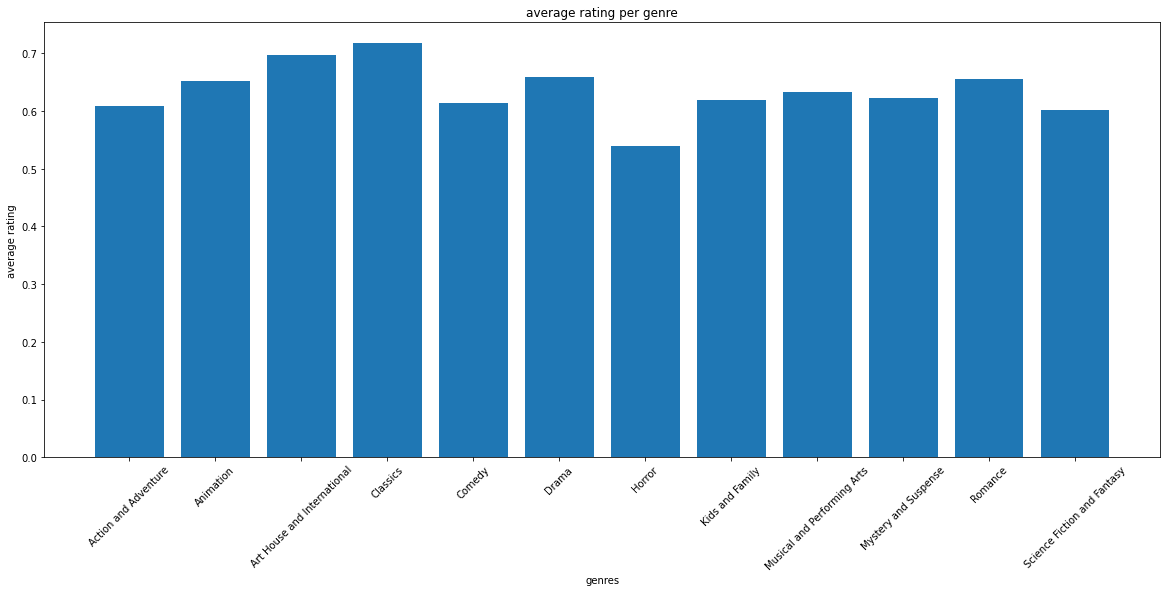

In [70]:
fig, ax11 = plt.subplots(figsize = (20,8))
x11 = average_rating_per_genre['genres']
y11 = average_rating_per_genre['mean_rating']
ax11.bar(x1,y1)
ax11.set_title('average rating per genre')
ax11.set_xlabel('genres')
ax11.set_ylabel('average rating')
plt.xticks(rotation = 45)

In [60]:
# The 4 genres that have the highest average ratings: 'Romance', 'Art House and International', 'Drama',
#  and 'Mystery and Suspense'

In [61]:
# creating a list of the four genres with the highest rating
four_genres_list = ['Romance','Art House and International','Drama','Mystery and Suspense']

In [62]:
# creating a dataset with only the four genres with the highest ratings
highest_rating_genres_dataset = merged_datasets[merged_datasets.genres.isin(four_genres_list)]

In [63]:
highest_rating_genres_dataset['genres'].value_counts()

Drama                          24708
Mystery and Suspense            8717
Romance                         6000
Art House and International     3304
Name: genres, dtype: int64

In [64]:
# the mean of runtime for the four highest rating genres
highest_rating_genres_dataset['runtime'].mean()

113.02798205013744

In [65]:
# standard deviation from the mean for the four highest rating genres
highest_rating_genres_dataset['runtime'].std()

22.683209099101425

In [66]:
# getting an average runtime for each of the four highest rating genres
avg_runtime_high_rating_genres = highest_rating_genres_dataset.groupby('genres', as_index=False)['runtime'].mean()

In [67]:
# renaming the 'runtime' column of the new dataset into the "mean_runtime" 
avg_runtime_high_rating_genres.rename(columns={'runtime': 'mean_runtime'}, inplace=True)

In [68]:
avg_runtime_high_rating_genres

,genres,mean_runtime
0,Art House and International,110.340212
1,Drama,113.950501
2,Mystery and Suspense,111.772480
3,Romance,112.525667


([0, 1, 2, 3],
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

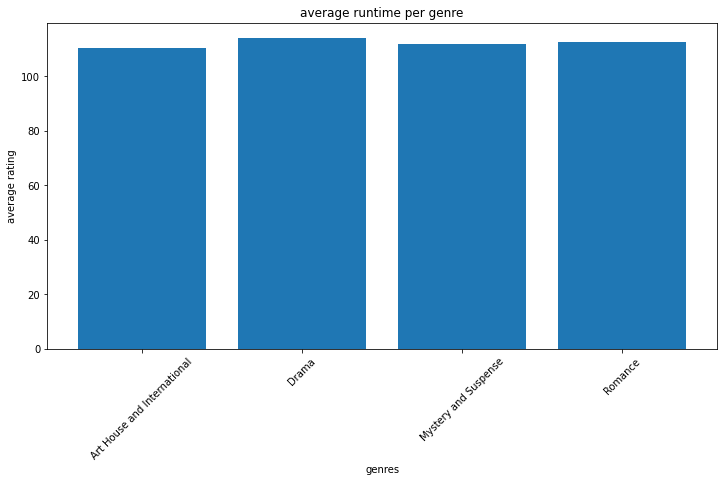

In [71]:
fig, ax22 = plt.subplots(figsize = (12,6))
x22 = avg_runtime_high_rating_genres['genres']
y22 = avg_runtime_high_rating_genres['mean_runtime']
ax22.bar(x2,y2)
ax22.set_title('average runtime per genre')
ax22.set_xlabel('genres')
ax22.set_ylabel('average rating')
plt.xticks(rotation = 45)

# Adonis's Analysis

In [3]:
df_gross.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


### Data analysis will focus on domestic and foreign gross for titles and studios.

In [4]:
#find null values
df_gross['domestic_gross'].isnull().value_counts()

False    3359
True       28
Name: domestic_gross, dtype: int64

In [5]:
df_gross['foreign_gross'].isnull().value_counts()

False    2037
True     1350
Name: foreign_gross, dtype: int64

In [6]:
df_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [7]:
#remove commas from values, convert to numeric
df_gross['foreign_gross'] = df_gross['foreign_gross'].str.replace(',', '')
df_gross['foreign_gross'] = pd.to_numeric(df_gross['foreign_gross'])
df_gross['foreign_gross'].head() 

0    652000000.0
1    691300000.0
2    664300000.0
3    535700000.0
4    513900000.0
Name: foreign_gross, dtype: float64

In [8]:
#remove null values from columns
df_gross.dropna(subset=['studio', 'domestic_gross', 'foreign_gross'], inplace=True)
df_gross.shape

(2007, 5)

In [9]:
#verification of null value deletion
df_gross.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2007 entries, 0 to 3353
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           2007 non-null   object 
 1   studio          2007 non-null   object 
 2   domestic_gross  2007 non-null   float64
 3   foreign_gross   2007 non-null   float64
 4   year            2007 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 94.1+ KB


### Do the studios that produce the most movies have the highest gross values?

In [10]:
#top ten studios with the most movies
df_gross['studio'].value_counts()[:10]

Uni.     144
Fox      134
WB       130
Sony     105
BV       104
Par.      94
LGF       87
Wein.     69
IFC       68
SPC       59
Name: studio, dtype: int64

In [11]:
x = list(df_gross['studio'].value_counts()[:10].index)
x

['Uni.', 'Fox', 'WB', 'Sony', 'BV', 'Par.', 'LGF', 'Wein.', 'IFC', 'SPC']

In [12]:
#top 10 studios domestic gross
dfm2 = df_gross.groupby(['studio']).domestic_gross.sum().reset_index().sort_values(by='domestic_gross', ascending=False)
d = dfm2[dfm2['studio'].isin(x)]

In [13]:
#total gross for each film
df_gross['total_gross'] = df_gross['domestic_gross'] + df_gross['foreign_gross']
df_gross.head()

,title,studio,domestic_gross,foreign_gross,year,total_gross
0,Toy Story 3,BV,415000000.0,652000000.0,2010,1.067000e+09
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010,1.025500e+09
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010,9.603000e+08
3,Inception,WB,292600000.0,535700000.0,2010,8.283000e+08
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,7.526000e+08


In [17]:
#sorting on domestic gross
f = df_gross.sort_values(by='domestic_gross', ascending=False)

f.head(20)

,title,studio,domestic_gross,foreign_gross,year,total_gross
1872,Star Wars: The Force Awakens,BV,936700000.0,1131.6,2015,9.367011e+08
3080,Black Panther,BV,700100000.0,646900000.0,2018,1.347000e+09
3079,Avengers: Infinity War,BV,678800000.0,1369.5,2018,6.788014e+08
1873,Jurassic World,Uni.,652300000.0,1019.4,2015,6.523010e+08
727,Marvel's The Avengers,BV,623400000.0,895500000.0,2012,1.518900e+09
2758,Star Wars: The Last Jedi,BV,620200000.0,712400000.0,2017,1.332600e+09
3082,Incredibles 2,BV,608600000.0,634200000.0,2018,1.242800e+09
2323,Rogue One: A Star Wars Story,BV,532200000.0,523900000.0,2016,1.056100e+09
2759,Beauty and the Beast (2017),BV,504000000.0,759500000.0,2017,1.263500e+09
2324,Finding Dory,BV,486300000.0,542300000.0,2016,1.028600e+09


### Some foreign gross values seem wrong for blockbuster films. Are there more?

In [15]:
#sorting df on foreign gross
g = df_gross.sort_values(by='foreign_gross', ascending=False)
g.head(20)

,title,studio,domestic_gross,foreign_gross,year,total_gross
328,Harry Potter and the Deathly Hallows Part 2,WB,381000000.0,960500000.0,2011,1.341500e+09
1875,Avengers: Age of Ultron,BV,459000000.0,946400000.0,2015,1.405400e+09
727,Marvel's The Avengers,BV,623400000.0,895500000.0,2012,1.518900e+09
3081,Jurassic World: Fallen Kingdom,Uni.,417700000.0,891800000.0,2018,1.309500e+09
1127,Frozen,BV,400700000.0,875700000.0,2013,1.276400e+09
2764,Wolf Warrior 2,HC,2700000.0,867600000.0,2017,8.703000e+08
1477,Transformers: Age of Extinction,Par.,245400000.0,858600000.0,2014,1.104000e+09
1876,Minions,Uni.,336000000.0,823400000.0,2015,1.159400e+09
3083,Aquaman,WB,335100000.0,812700000.0,2018,1.147800e+09
1128,Iron Man 3,BV,409000000.0,805800000.0,2013,1.214800e+09


In [16]:
#Checking for more misreported foreign gross
g.tail(20)

,title,studio,domestic_gross,foreign_gross,year,total_gross
187,"Waiting for ""Superman""",ParV,6400000.0,9300.0,2010,6409300.0
2696,Troublemakers: The Story of Land Art,FRun,29500.0,9100.0,2016,38600.0
300,Saint John of Las Vegas,IVP,103000.0,9100.0,2010,112100.0
279,Karthik Calling Karthik,Eros,286000.0,7100.0,2010,293100.0
305,Enemies of the People,ICir,73200.0,6400.0,2010,79600.0
320,Nenette,Kino,18000.0,5400.0,2010,23400.0
3342,Reign of Judges: Title of Liberty - Concept Short,Darin Southa,93200.0,5200.0,2018,98400.0
317,Bluebeard,Strand,33500.0,5200.0,2010,38700.0
715,Aurora,CGld,5700.0,5100.0,2011,10800.0
266,The Extra Man,Magn.,453000.0,4500.0,2010,457500.0


### Foreign Gross values for some blockbusters are obviously misreported. Analysis will focus on domestic markets, as foreign gross values cannot be verified/trusted.

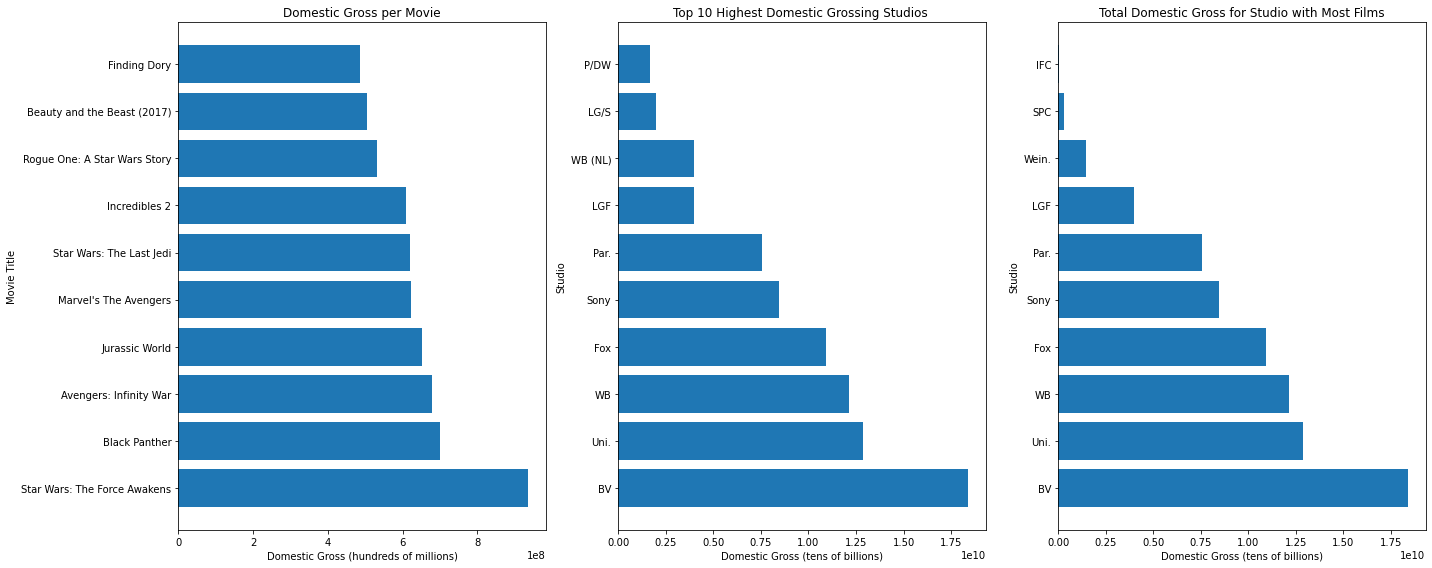

In [18]:
#domestic gross per title
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(20,8))

x1 = f['title'][:10]
y1 = f['domestic_gross'][:10]
ax1.barh(x1, y1)
ax1.set_xlabel("Domestic Gross (hundreds of millions)")
ax1.set_ylabel("Movie Title")
ax1.set_title("Domestic Gross per Movie")


#Domestic gross per studio
dfm3 = df_gross.groupby(['studio']).domestic_gross.sum().reset_index().sort_values(by='domestic_gross', ascending=False)


x2 = dfm3.studio[:10]
y2 = dfm3.domestic_gross[:10]
ax2.barh(x2, y2)
ax2.set_xlabel('Domestic Gross (tens of billions)')
ax2.set_ylabel('Studio')
ax2.set_title('Top 10 Highest Domestic Grossing Studios ')

#domestic gross for studios with most films
x = ['Uni.', 'Fox', 'WB', 'Sony', 'BV', 'Par.', 'LGF', 'Wein.', 'IFC', 'SPC']


x3 = d['studio']
y3 = d['domestic_gross']
ax3.barh(x3, y3)
ax3.set_xlabel("Domestic Gross (tens of billions)")
ax3.set_ylabel("Studio")
ax3.set_title('Total Domestic Gross for Studio with Most Films')

fig.tight_layout()

# Insights
<ul>
    <li> From the data we can see that outside of the largest studios (BV, Uni, WB, Fox, Sony), the number of films doesn't correlate with highest domestic gross. As such, we recommend that Microsoft focuses on quality content in Drama, Action and Comedy.
    <li> The highest grossing films are all franchises (Marvel, Jurassic Park, Star Wars, etc). It is highly recommended that any action films made be based upon Microsoft franchises to avoid licensure/copyright fees(this caused issues for Microsoft in the past with potential Halo films).
    <li> Smaller studios such as Weinstein, SPC and IFC could potentially be acquired to acclerate content production.
</ul>